/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and wil

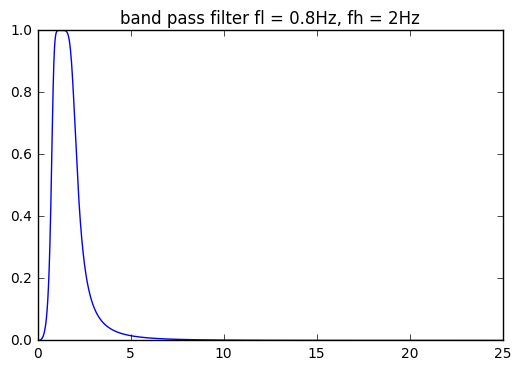

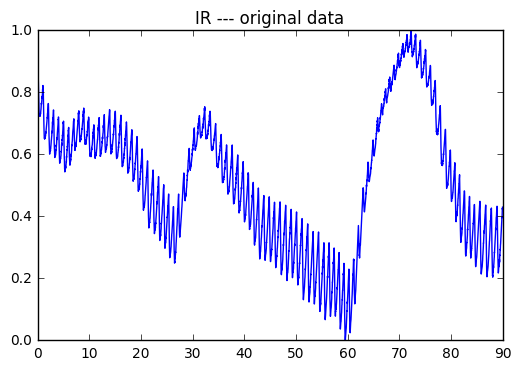

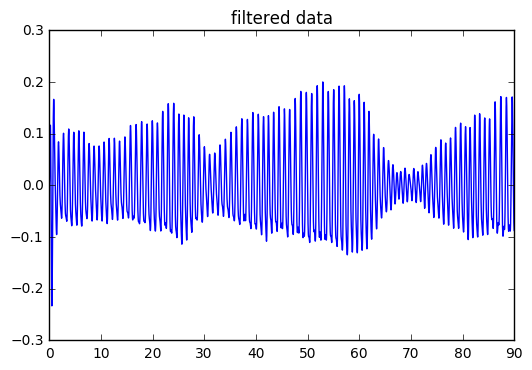

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.signal import firwin
from scipy.signal import freqz
from scipy.signal import find_peaks_cwt
from scipy.signal import butter, lfilter

%matplotlib inline
data = np.genfromtxt("takashin_Homework_sample.csv", dtype=float, delimiter=',', names=True)
timestamp = data['timesecond']
scaler = preprocessing.MinMaxScaler()
IR = scaler.fit_transform(data['IR'])
RED = scaler.fit_transform(data['RED'])

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = butter(order, [low, high], btype='band', analog = False)
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

fs = 50.0
lowcut = 0.8
highcut = 2
order = 3
# lowcut = 0.15 for resp
# highcut = 0.34

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()

b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = 3")
plt.title("band pass filter fl = 0.8Hz, fh = 2Hz")
    
plt.figure()
y = butter_bandpass_filter(RED, lowcut, highcut, fs, order)
plt.plot(timestamp, IR)
plt.title("IR --- original data")
plt.figure()
plt.plot(timestamp, y)
plt.title("filtered data")
# plt.figure()
# plt.plot()

In [37]:
# def caculateHeartRate (data):
inputData = y
inputTime = timestamp
peakind = find_peaks_cwt(inputData, np.arange(5,10))
print "number of peak %d" % len(peakind)

def caculateHeartRate(timestamp, data, width, fs):
    peakind = find_peaks_cwt(inputData, width)
    numberOfPeak = len(peakind)
    print "number of peak %d" % numberOfPeak
    firstPeakTime = timestamp[peakind[0] - 1]
    lastPeakTime = timestamp[peakind[numberOfPeak - 1] - 1]
    timeInterval = lastPeakTime - firstPeakTime
    print "total timeInterval %f" % timeInterval
    averageDistance = timeInterval/(numberOfPeak - 1)
    print "average distance is %f" % averageDistance
    return 60 / averageDistance

print caculateHeartRate(inputTime, inputData,  np.arange(8,10), 50)

number of peak 88
number of peak 87
total timeInterval 89.400000
average distance is 1.039535
57.7181208054


([32], array([ 1.6]), array([ 0.9995736]))

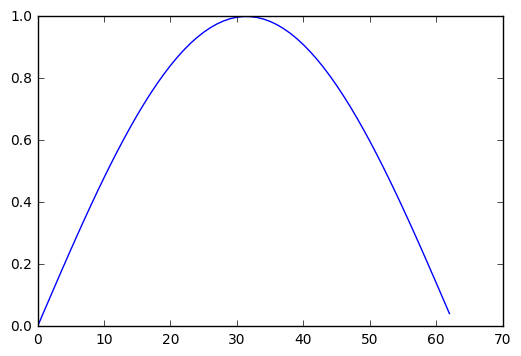

In [38]:
from scipy import signal
xs = np.arange(0, np.pi, 0.05)
data = np.sin(xs)
plt.plot(data)
peakind = signal.find_peaks_cwt(data, np.arange(1,10))
peakind, xs[peakind], data[peakind]